In [1]:
import matplotlib.pyplot as plt

In [2]:
# Veriyi tutmak için listeler
thread_counts = []
execution_times_ms = []

In [3]:
# Dosyayı açıp okumak
with open("output.txt", "r", encoding="utf-8") as file:
    lines = file.readlines()[1:]  # İlk satırı atla (başlık)
    for line in lines:
        if line.strip():  # Boş satırları atla
            # Satırı temizle ve doğru şekilde ayrıştır
            parts = [p.strip() for p in line.split() if p.strip()]
            try:
                thread_count = int(parts[0])  # İplik sayısı
                execution_time = float(parts[1].replace(",", "."))  # Süre (ms)
                thread_counts.append(thread_count)
                execution_times_ms.append(execution_time)
            except (ValueError, IndexError) as e:
                # Hatalı satırları atla
                print(f"Hatalı satır atlandı: {line.strip()}")

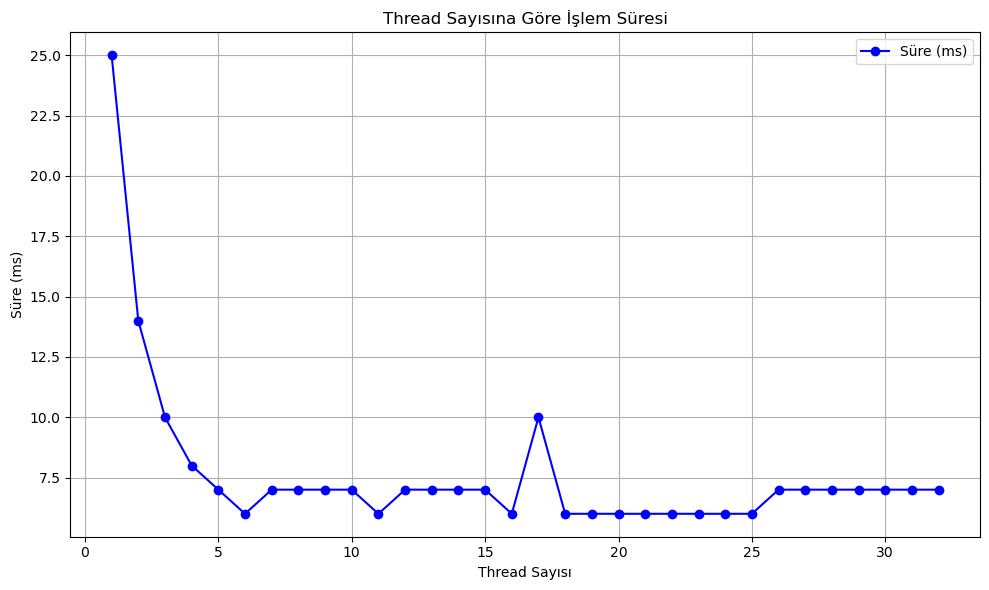

In [4]:
# Boyut kontrolü ve senkronizasyon düzeltmesi
if len(thread_counts) != len(execution_times_ms):
    print("Hata: thread_counts ve execution_times_ms listelerinin boyutları eşleşmiyor.")
    print(f"thread_counts: {len(thread_counts)}, execution_times_ms: {len(execution_times_ms)}")
    
    # Eşit olmayan fazlalıkları temizleme
    min_length = min(len(thread_counts), len(execution_times_ms))
    thread_counts = thread_counts[:min_length]
    execution_times_ms = execution_times_ms[:min_length]

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.plot(thread_counts, execution_times_ms, marker="o", linestyle="-", color="b", label="Süre (ms)")

plt.title("Thread Sayısına Göre İşlem Süresi")
plt.xlabel("Thread Sayısı")
plt.ylabel("Süre (ms)")
plt.grid(True)
plt.legend()
plt.tight_layout()

In [14]:
# Grafik gösterimi
plt.show()